<img style="float: right; margin: 0px 0px 15px 15px;"
src="MontecarloImag.jpeg" width="300px" height="100px" />
# Técnicas de reducción de varianza

**Objetivos:**
1. Estudiar el método de integración montecarlos para aproximación de integrales.
2. Estudiar dos técnicas para reducción de varianza
   - Muestreo estratificado
   - Método de números aleatorios complementarios


## 1. Integración numérica Montecarlo

En esta clase veremos una técnica alternativa de integración numérica (métodos numéricos): Integración Montecarlo

### Introducción

En matempaticas financieras un problema frecuente es el valuar instrumentos financieros cuyos rendimientos son aleatorios. Por ejemplo los instrumentos de renta variable, las inversiones en la bolsa o los derivados, cuyos rendimientos dependen del comportamiento de una acción o de un bien como el oro o el petróleo. La valuación de estos instrumentos se reduce, al cálculo de una esperanza de una función continua de una variable aleatoria.

Recordando algunos conceptos de probabilidad. Sea **$x$ una variable aleatoria continua**, si su función de densidad de probabilidad es $f(x)$, en un intervalo $[\alpha,\beta]$, entonces

$$ P(X\leq c) = \int_\alpha^c f(x) dx$$

$$ \textbf{Esperanza}\rightarrow E(g(x))=\int_\alpha^\beta g(x)f(x) dx $$
$$ \textbf{Varianza}\rightarrow Var(g(x))=E(g(x)^2)-E(g(x))^2=\int_\alpha^\beta g(x)^2f(x) dx -E(x)^2$$

Con frecuencia no es posible aplicar un método de integración para calcular en forma exacta la integral. En ese caso hay que aproximar la integral por medio de un método de integración numérico o por monte carlo. 

## Método monte carlo

Se sabe por la Ley de los Grandes Números que un buen estimador del valor esperado de una variable aleatoria continua $X$ con distribución $F$ es el valor promedio de una muestra finita de variables aleatorias, independientes con distribución $F$: Es decir
$$ E(X)\approx \frac{1}{M}\sum_{i=1}^M X_i$$

Como la esperanza de una variable aleatoria continua es una integral, la media muestral se puede usar para estimar el valor de una integral. Esta es la idea que está detrás del método de Monte-Carlo.

Esta idea se puede generalizar para estimar el valor esperado de una función $G$ continua cuyo argumento es una variable aleatoria con distribución $F$: Si se tiene una muestra de variables aleatorias, independientes, idénticamente distribuidas con distribución $F$; entonces

$$ E(G(X))\approx \frac{1}{M}\sum_{i=1}^M G(X_i)$$

### Aplicación al cálculo de integrales

En el caso de interés, se desea estimar la integral de una función $G$ continua, esta integral puede verse como el cálculo del valor esperado de la función $G$ cuando se aplica a una variable aleatoria con distribución uniforme. Supongamos que el intervalo de integración es $[0, 1]$ y sea $x_1, x_2, \cdots, x_M$ una muestra de variables aleatorias, independientes
con distribución uniforme en el intervalo $[0, 1]$ entonces:

$$ \int_0^1G(x)dx = E(G(x)) \approx \frac{1}{M}\sum_{i=1}^M G(x_i)$$

**Todo el problema se reduce a generar la muestra**.

Por otro lado observe que toda integral en el intervalo $[a,b]$ se puede transformar a una integral sobre el intervalo $[0,1]$, con el siguiente cambio de variable $u = \frac{x-a}{b-a} \rightarrow x = a+(b-a)u$ con $dx=(b-a)du$, entonces

$\int_a^b G(x)dx= (b-a)\int\limits_0^1 G(a+(b-a)u)du\approx \frac{(b-a)}{M}\sum\limits_{i=1}^M G(\underbrace{a+(b-a)u_i}_{variable \ U\sim[a,b]})$

con $u_i$ variables aleatorias uniformes en el intervalo $[0,1]$

Escribamos una función que tenga como entradas:
- la función a integrar $f$,
- los límites de integración $a$ y $b$, y
- los números aleatorios distribuidos uniformemente entre $[a,b]$,

y que devuelva la aproximación montecarlo de la integral $\int_{a}^{b}f(x)\text{d}x$.

In [1]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

In [2]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

### Ejemplo 

Aproxime el valor de la siguiente integral usando el método monte carlo

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

In [3]:
np.logspace(1,7,7,dtype=int)


array([      10,      100,     1000,    10000,   100000,  1000000,
       10000000])

In [4]:
I = 1/3
# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int)

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Valor_aproximacion', 'Error_relativo%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))

# Mostramos los resultados en la tabla previamente creada
df.loc[N,"Valor_aproximacion"] = I_m
df.loc[N,"Error_relativo%"] = np.abs(df.loc[N,"Valor_aproximacion"]-I)*100/I
df

,Valor_aproximacion,Error_relativo%
Cantidad_terminos,,
10,0.300504,9.848751
100,0.312645,6.206645
1000,0.331102,0.669436
10000,0.330659,0.802391
100000,0.333596,0.078927
1000000,0.333590,0.077091
10000000,0.333282,0.015288


### Nota:
Sean $I=E(g(x))$ y el estimado de $I$ es $\tilde I_M = \frac{1}{M}\sum\limits_{i=1}^M g(X_i)$. Tome $\sigma$ como la desviación estándar de $g(X)$ y $\tilde \sigma$ como la desviación estándar muestral. Por lo tanto, se tiene entonces que:

$$ Var(\tilde I_M)=\frac{\sigma^2}{M} \longrightarrow std(\tilde I_M)=\frac{\sigma}{\sqrt{M}}\longrightarrow \text{Dispersión disminuye con la cantidad de datos}$$

Típicamente no se tiene conocimiento de $\sigma$ por lo tanto se puede estimar por medio de la varianza muestral.
$$\tilde \sigma^2=\frac{1}{M-1}\sum\limits_{i=1}^{M}(g(X_i)-\tilde I_M)^2$$

### Conclusión 

Si se desea disminuir el error de estimación de la integral (desviación estándar), hay dos caminos:
   1. Aumentar la cantidad de muestras a evaluar en la función, **(Proceso lento)**, o
   2. Utilizar técnicas para disminuir la varianza.

# 2. Reducción de varianza

## a. Muestreo estratificado (intervalos igualmente espaciados)

La idea radica en la observación de que la población puede ser **heterogénea** y consta de varios subgrupos homogéneos (como género, raza, estado económico social, etc.). Si deseamos aprender sobre toda la población (como por ejemplo, si a la gente en México le gustaría votar en las próximas elecciones presidenciales), podemos tomar una muestra aleatoria de toda la población para estimar esa cantidad. Por otro lado, sería más eficiente tomar muestras pequeñas de cada subgrupo y combinar las estimaciones en cada subgrupo según la fracción de la población representada por el subgrupo. Dado que podemos conocer la opinión de un subgrupo homogéneo con un tamaño de muestra relativamente pequeño, este procedimiento de muestreo estratificado sería más eficiente.

Si nosotros deseamos estimar $E(X)$, donde $X$ depende de una variable aleatoria $S$ que toma uno de los valores en $\{1, ...,k\}$ con probabilidades conocidas, entonces la técnica de estratificación se ejecuta en k grupos, con el i-ésimo grupo que tiene $S = i$, tomando $\bar X_i$ es el valor promedio de $X$ cuando se estuvo en el grupo $S = i$, y luego se estima $E(x)$ por:
$$E(x)=\sum\limits_{i=1}^{k}\underbrace{E(X|S=i)}_{\text{media muestral del i-ésimo grupo}}P(S=i)=\sum\limits_{i=1}^{k} \bar X_i P(S=i)$$

Para ilustrar considere que queremos estimar $E(g(U))=\int_0^1g(x)dx$. Para esto vamos a considerar dos estimadores basados en una muestra de 2n corridas.

1.**Método estándar (visto anteriormente)**
$$\textbf{media}\rightarrow \hat g=\frac{1}{2n}\sum\limits_{i=1}^{2n} g(U_i)$$

$$\textbf{varianza}\rightarrow Var(\hat g)=\frac{1}{4n^2}\sum\limits_{i=1}^{2n} Var(g(U_i))=\frac{1}{2n}\bigg[\int_0^1g^2(x)dx-\bigg(\int_0^1g(x)dx\bigg)^2\bigg]$$
Por otro lado nosotros podemos escribir

$$E(g(U))=\int_0^{1/2}g(x)dx + \int_{1/2}^1g(x)dx$$

   - Seleccionamos $n$ U's de $[0,1/2]$
   - Seleccionamos $n$ U's de $[1/2,1]$
   
2.Con esta nueva selección construimos el **estimador estratificado**:

$$\textbf{media}\rightarrow \hat g_s=\frac{1}{2n}\big[\sum\limits_{i=1}^{n} g(\underbrace{U_i/2}_{U\sim [0,1/2]}) + \sum\limits_{i=n+1}^{2n} g\big((\underbrace{U_i+1)/2}_{U\sim [1/2,1]}\big)\big]$$

$$\textbf{varianza}\rightarrow Var(\hat g_s)=\frac{1}{4n^2}\big[\sum\limits_{i=1}^{n} Var(g(U_i/2)) + \sum\limits_{i=n+1}^{2n} Var(g\big((U_i+1)/2\big))\big]$$

Realizando el cálculo directo tomando $U_i\sim U(0,1)$, se puede mostrar que:

$$Var(g(U_i/2)) = 2 \int_0^{1/2} g^2(x)dx - 4m_1^2,$$
$$Var(g((U_i+1)/2)) = 2 \int_{1/2}^1 g^2(x)dx - 4m_2^2,$$

donde $m_1 = \int_0^{1/2}g(x)dx$ y $m_2 = \int_{1/2}^1g(x)dx$

Realizando varias manipulaciones algebraicas se llega a que 

> $$Var(\hat g_s) = Var(\hat g)-\frac{1}{2n}(m_1-m_2)^2$$

<font color ='red'> La varianza se disminuye con respecto a $Var(\hat g)$. Note también que en el ejemplo anterior se consideraron dos estratos, por eso únicamente aparecen $m_1$, $m_2$, pero si se hubieran tomado $n$ estratos, tendríamos que la reducción de varianza sería 
> $$Var(\hat g_s) = Var(\hat g)-\frac{1}{2n}(m_1-m_2-m_3-\cdots - m_n)^2$$

> **Referencia**: Handbook in Monte Carlo simulation applications in financial engineering, risk management, and economics, pág. 97.

# Esbozo  del método de muestreo estratificado

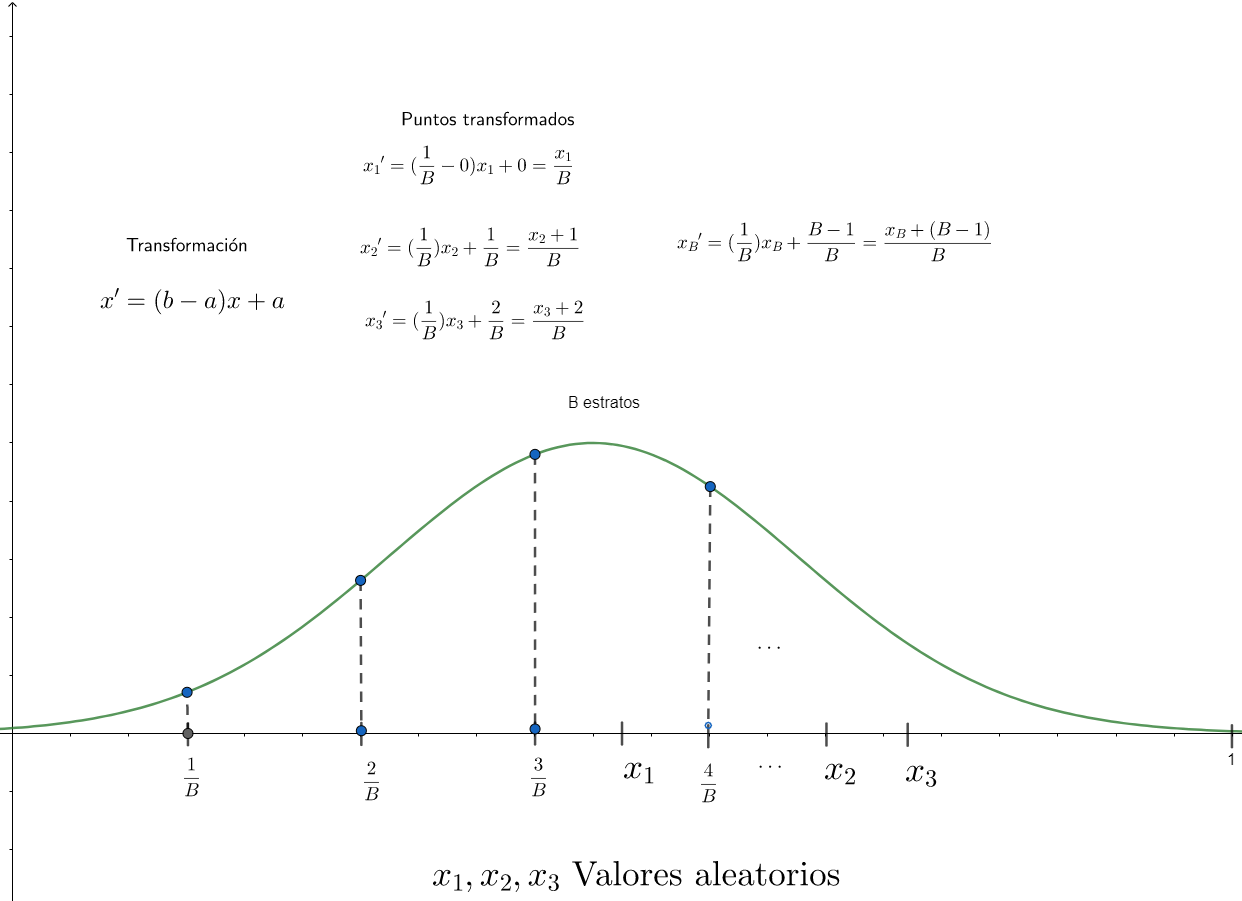

## Ejemplo 1

Estimar la media de una distribución normal usando el método de la transformada inversa visto en clases pasadas y aplicar el método de de reducción de varianza estratificado.

In [12]:
u = np.array([0.99, .88, .77])

B = 3
(u + np.arange(0, B))/B

array([0.33      , 0.62666667, 0.92333333])

Media de la distribución con M. estándar, 4.423970872145002


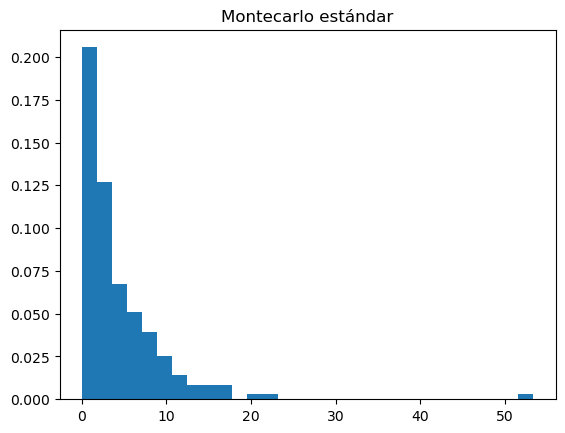

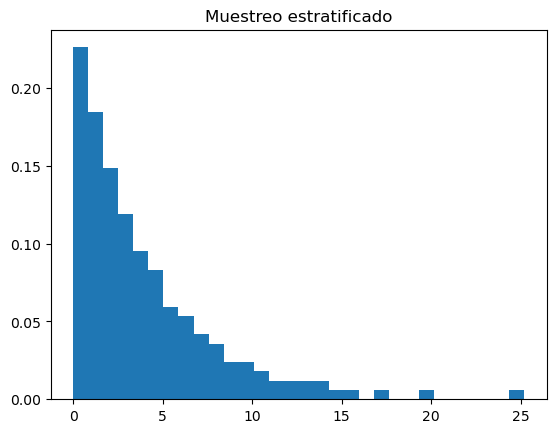

In [14]:
N = 200
# (Método transformada inversa visto en clases pasadas)
mti_exp = lambda U, theta: -np.log(U)*theta

# Método montecarlo estándar para distribución normal
u = np.random.rand(N)

montecarlo_standar = mti_exp(u, 4) 

print('Media de la distribución con M. estándar,', montecarlo_standar.mean())
plt.hist(montecarlo_standar,30,density=True)
plt.title('Montecarlo estándar')
# plt.xlim((-3.5,3.5))
plt.show()

# Método muestreo estratificado (B estratos)
B = N
u_estatrificado = (np.random.rand(N) + np.arange(0, B))/B
m_estratificado = mti_exp(u_estatrificado, 4) 

plt.hist(m_estratificado,30,density=True)
plt.title('Muestreo estratificado')
# plt.xlim((-3.5,3.5))
plt.show()

### Ejemplo 2
Estimar la media de la siguiente función de distribución de  exponencial:
$$\textbf{Densidad}\rightarrow f(x)=e^{-x}\rightarrow \text{media = 1}$$
$$\textbf{Acumulada}\rightarrow F(x)=1-e^{-x}$$

Usando el método de la transformada inversa que realizamos en clases pasadas, obtuvimos que para generar números aleatorios de esta distribución tenía que aplicarse $x_i=-ln(u_i)$ con $u_i \sim U[0,1]$.

Suponga entonces que generamos 10 muestras y con eso intentamos estimar la media de esta función de distribución, como se muestra a continuación:

In [15]:
np.random.seed(55555)
ui = np.random.rand(10)
i = np.arange(1,11)

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index= i,columns=['Numero_Aleatorio', 'Observacion_generada','Media_muestral'], dtype='float')
df.index.name = "Cantidad_terminos"

xi = -np.log(ui)

media_no_estrato = np.mean(xi)
# Mostramos los resultados en la tabla previamente creada
df.loc[len(i),"Media_muestral"] ='Media muestral = %f'%media_no_estrato
df.loc[i,"Numero_Aleatorio"] = ui
df.loc[i,"Observacion_generada"] = xi
# print('La media de la muestra es=',np.mean(xi)
df


,Numero_Aleatorio,Observacion_generada,Media_muestral
Cantidad_terminos,,,
1,0.129104,2.047133,NaN
2,0.872152,0.136791,NaN
3,0.795504,0.228780,NaN
4,0.878771,0.129231,NaN
5,0.449543,0.799523,NaN
6,0.575340,0.552795,NaN
7,0.829415,0.187034,NaN
8,0.873115,0.135688,NaN
9,0.140971,1.959203,NaN


In [25]:
np.random.seed(55555)
N = 10
B = N
ui = np.random.rand(N)
i = np.arange(0,N)
u_estra = (ui + i) / B

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=i,columns=['Numero_Aleatorio', 'Observacion_generada','Media_muestral'], dtype='float')
df.index.name = "Cantidad_terminos"

xi_estra = -np.log(u_estra)

media_estrato = np.mean(xi_estra)
# Mostramos los resultados en la tabla previamente creada
df.loc[N - 1, "Media_muestral"] ='Media muestral = %f'%media_estrato
df.loc[i,"Numero_Aleatorio"] = u_estra
df.loc[i,"Observacion_generada"] = xi_estra
# print('La media de la muestra es=',np.mean(xi)
df

,Numero_Aleatorio,Observacion_generada,Media_muestral
Cantidad_terminos,,,
0,0.012910,4.349718,NaN
1,0.187215,1.675496,NaN
2,0.279550,1.274573,NaN
3,0.387877,0.947067,NaN
4,0.444954,0.809784,NaN
5,0.557534,0.584232,NaN
6,0.682942,0.381346,NaN
7,0.787311,0.239131,NaN
8,0.814097,0.205676,NaN


### Ejemplo 3

Aproxime el valor de la siguiente integral usando el método monte carlo con reducción de varianza

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

In [26]:
def m_estratificado(a, b, B):
    Ui = np.random.uniform(a, b, B)
    Bi = np.arange(0, B)
    Ui_estra = (Ui + Bi) / B
    return Ui_estra

In [27]:
I = 1/3
# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int)

# Definimos la tabla donde se mostrarán los resultados
columns=['Valor_aproximacion_crudo', 'Valor_aproximacion_RV']
df = pd.DataFrame(index=N, columns=columns, dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda n:np.random.uniform(a,b,n),N))

# Números aleatorios dependiente de la cantidad de términos N - estratificado
ui_estra = list(map(lambda n: m_estratificado(a, b, n), N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))

I_m_rv = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui_estra))

# Mostramos los resultados en la tabla previamente creada
df["Valor_aproximacion_crudo"] = I_m
df["Valor_aproximacion_RV"] = I_m_rv
df["Error_relativo_crudo%"] = np.abs(df["Valor_aproximacion_crudo"] - I) * 100 / I
df["Error_relativo_RV%"] = np.abs(df["Valor_aproximacion_RV"] - I) * 100 / I

df

,Valor_aproximacion_crudo,Valor_aproximacion_RV,Error_relativo_crudo%,Error_relativo_RV%
Cantidad_terminos,,,,
10,0.291172,0.339837,12.648476,1.951151e+00
100,0.322841,0.333277,3.147817,1.682362e-02
1000,0.323111,0.333341,3.066766,2.336197e-03
10000,0.331467,0.333334,0.559791,1.997820e-04
100000,0.334157,0.333333,0.247043,7.383575e-07
1000000,0.333132,0.333333,0.060342,1.658612e-07
10000000,0.333403,0.333333,0.021047,1.052075e-09


In [13]:
N


array([      10,      100,     1000,    10000,   100000,  1000000,
       10000000])

## b. Usando muestreo estratificado (donde el tamaño de los estratos no esta igualmente espaciado)

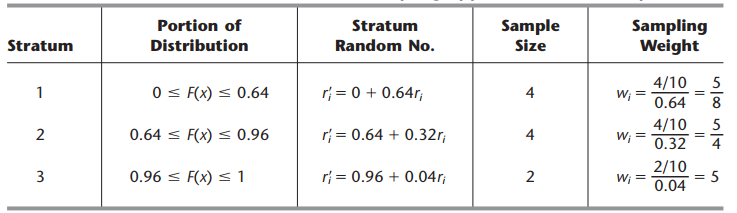

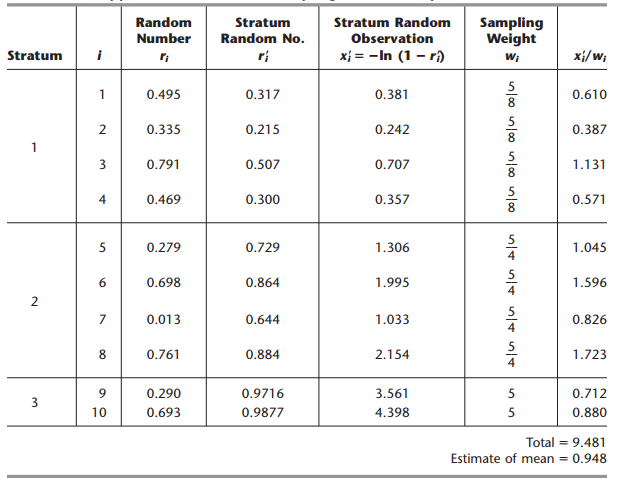

In [20]:
np.random.seed(555)

# Programar método muestreo estratíficado (no igualmente espaciado)
n = [4, 4, 2]

r1 = np.random.uniform(0, 0.64, n[0])
r2 = np.random.uniform(0.64, 0.96, n[1])
r3 = np.random.uniform(0.96, 1, n[2])
r = [r1, r2, r3]

w = [5/8, 5/4, 5]

xi = lambda r: -np.log(r)

valores_aleatorios = np.concatenate(r)
muestras_estratificadas = np.concatenate(list(map(lambda ri, wi: xi(ri)/wi, r, w)))

media_estratificado = muestras_estratificadas.mean()
media_no_estratificado = xi(valores_aleatorios).mean()

# Definimos la tabla donde se mostrarán los resultados
i = np.arange(1,11)
df = pd.DataFrame(index= i,
                  columns=['Numero_Aleatorio_Estrato','Observacion_generada','xi/w'], 
                  dtype='float')
df.index.name = "términos"

# Mostramos los resultados en la tabla previamente creada
df.loc[i,"Numero_Aleatorio_Estrato"] = valores_aleatorios
df.loc[i,"Observacion_generada"] = xi(valores_aleatorios)
df.loc[i,"xi/w"] = muestras_estratificadas
print('La media de la muestra es=', media_estratificado)
df

La media de la muestra es= 0.9684481321172186


,Numero_Aleatorio_Estrato,Observacion_generada,xi/w
términos,,,
1,0.459414,0.777804,1.244486
2,0.030627,3.485864,5.577382
3,0.604462,0.503416,0.805466
4,0.439283,0.822611,1.316177
5,0.825986,0.191177,0.152942
6,0.685657,0.377378,0.301902
7,0.942694,0.059013,0.047211
8,0.748797,0.289287,0.231430
9,0.984817,0.015299,0.003060


In [9]:
# Analizar función concatenate
np.concatenate(muestras).mean()
muestras

[array([1.64934896, 1.694749  , 1.6405586 , 2.25359341]),
 array([0.31075645, 0.07481608, 0.10525654, 0.05090204]),
 array([0.00112855, 0.0023489 ])]

### Parámetros de entrega
Se debe de entregar este ejercicio para el próximo martes 21 de marzo hasta las 8 pm, en un link que se habilitará en canvas.

In [22]:
media_estrato = media_estratificado
print('La media muestral estimada método estratificado es    = ',media_estrato)
print('La media muestral estimada método no estratificado es = ',media_no_estratificado)
print('Error relativo método estratificado    = ',(1-media_estrato)*100)
print('Error relativo método no estratificado = ',(1-media_no_estratificado)*100)

La media muestral estimada método estratificado es    =  0.9684481321172186
La media muestral estimada método no estratificado es =  0.6543974140935386
Error relativo método estratificado    =  3.1551867882781415
Error relativo método no estratificado =  34.56025859064614


# Tarea 

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}e^{x^2}\text{d}x\approx 1.46265$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado (igualmente espaciado), recibiendo como  parámetros de entrada la cantidad de estratos, los valores a y b en los cuales se deben de generar los números aletorios y retornando las variables estratíficadas correspondientes.
2. Cree una función que realice el método de muestreo estratíficado (con intervalos no igualmente espaciados), recibiendo como parámetro la cantidad de términos que se tienen que generar en cada estrato y regrese las variables aleatorias estratificadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente tabla:

| Cantidad de términos | Montecarlo crudo | Error 1% | Montecarlo estratíficado 1 | Error 2 % | Montecarlo estratíficado 2 | Error 3 % |
|:--------------------:|:----------------:|:--------:|:--------------------------:|:---------:|:--------------------------:|:---------:|
|          10          |                  |          |                            |           |                            |           |
|          100         |                  |          |                            |           |                            |           |
|         1000         |                  |          |                            |           |                            |           |
|         10000        |                  |          |                            |           |                            |           |
|        100000        |                  |          |                            |           |                            |           |
|        1000000       |                  |          |                            |           |                            |           |

### Parámetros de entrega
Se debe de entregar este ejercicio para el próximo martes 21 de marzo hasta las 8 pm, en un link que se habilitará en canvas.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>